# Noise Reduction 

In [22]:
from dataset import BirdData
import IPython.display as ipd
import matplotlib.pyplot as plt

In [23]:
data = BirdData()

In [152]:
file = 4

fs, audio_buffer_full = data._read_audio("{}.wav".format(file))

In [161]:
audio_length = 3

frame_duration = 50 # milli seconds
frame_size = int(frame_duration / 1000 * fs)
start_frame = 0*fs

In [162]:
audio_buffer = audio_buffer_full[:audio_length*fs, 0] # only use channel 1 for now

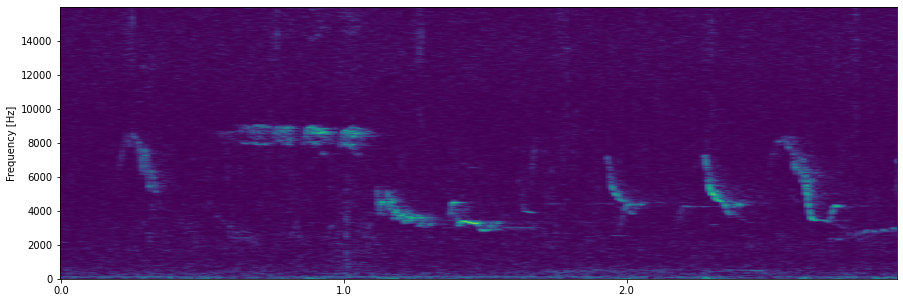

In [163]:
spec, fig = data.plot_spectrogram(audio_buffer, fs, frame_size, log_spectrogram=True)

In [164]:
ipd.Audio(audio_buffer, rate=fs)

## Bandpass Filter

In [165]:
from scipy.signal import butter, lfilter

def butter_bandpass(lowcut, highcut, fs, order=1):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y


In [166]:
filtered_audio = butter_bandpass_filter(audio_buffer, 1000, 8000, fs)

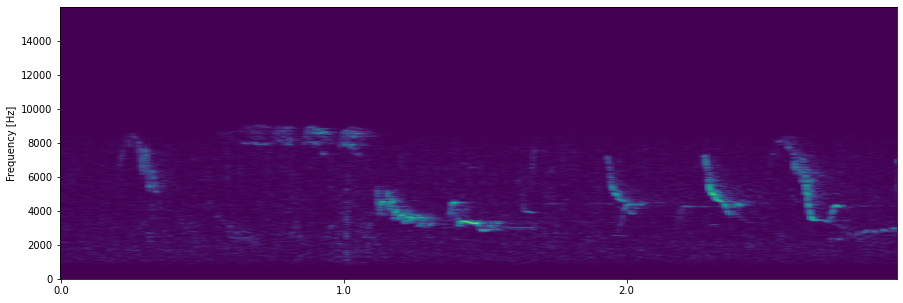

In [167]:
spec, fig = data.plot_spectrogram(filtered_audio, fs, frame_size, log_spectrogram=True)

In [168]:
ipd.Audio(filtered_audio, rate=fs)

## noisereduce Library

In [169]:
import noisereduce as nr

reduced_noise = nr.reduce_noise(y=audio_buffer,sr=fs) 

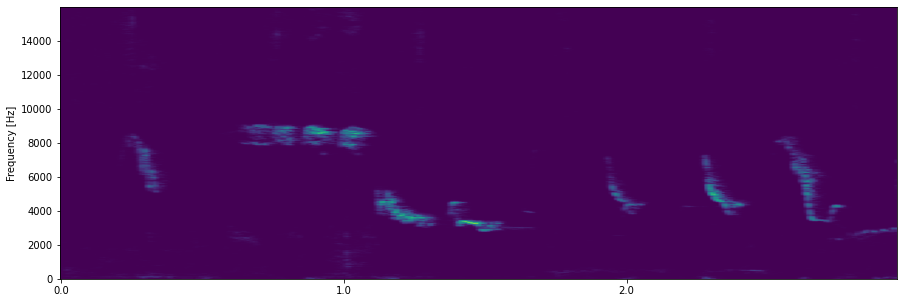

In [170]:
spec, fig = data.plot_spectrogram(reduced_noise, fs, frame_size, log_spectrogram=True)

In [171]:
ipd.Audio(reduced_noise, rate=fs)

## Ensemble Approach

In [172]:
reduced_filtered_audio = butter_bandpass_filter(reduced_noise, 1000, 8000, fs)

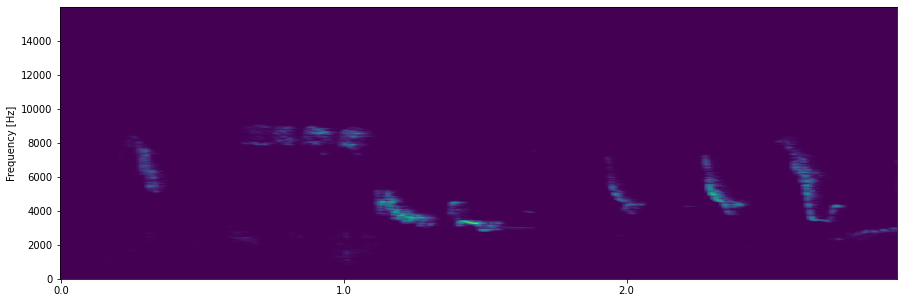

In [173]:
spec, fig = data.plot_spectrogram(reduced_filtered_audio, fs, frame_size, log_spectrogram=True)

In [174]:
ipd.Audio(reduced_filtered_audio, rate=fs)

In [175]:
spec

array([[1.90752030e-08, 6.42192110e-07, 1.03963718e-07, ...,
        5.94308638e-05, 4.76396658e-05, 2.48276353e-05],
       [9.58861928e-09, 3.21954233e-07, 5.21464984e-08, ...,
        2.97121142e-05, 2.38125217e-05, 1.24177654e-05],
       [3.45229233e-14, 2.92191222e-13, 5.94990047e-14, ...,
        1.58149705e-13, 4.55258997e-13, 2.65961515e-13],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.64327467e-17, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 9.64327467e-17, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])